In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.datasets import *

from tree_diff.tree import *

## Decision Tree Features
* ~Handle multiclass/binary~
* Binary or multple splits: Binary only 
* Choice of stopping criteria
* Choice of evaluation measure 
* Choice of splitting criteria 
* Choice of pruning strategy 
* Opaque rules

In [2]:
a = load_iris()
X = a.data
y = a.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

# Simple Decision tree

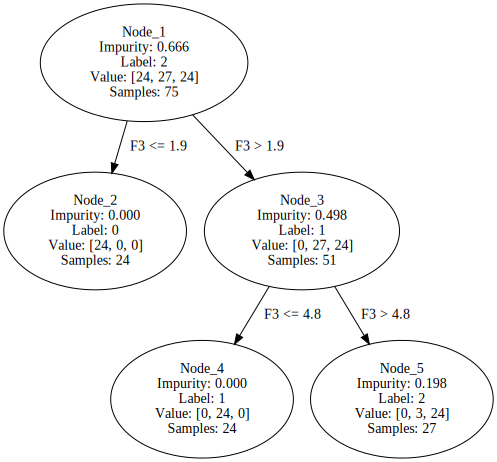

In [3]:
tree = grow_tree(pd.DataFrame(X_train, columns=["F1", "F2", "F3", 'F4']), y_train, max_depth=2, min_samples_split=2)
tree.plot()

# Sample datasets

In [4]:
datasets = [load_iris, load_breast_cancer, load_digits, load_wine]

for func_data in datasets:
    d = func_data()
    X = d.data
    y = d.target
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
    
    tree = grow_tree(pd.DataFrame(X_train), y_train, max_depth=2)            
    y_pred_cust = [tree.predict(X_test[i]) for i in range(0, X_test.shape[0])]
    
    sklearn_dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)    
    y_pred = sklearn_dt.predict(X_test)
    
    print(f"Sklearn Decision Tree:{accuracy_score(y_test, y_pred):0.2f}, Custom Tree:{accuracy_score(y_test, y_pred_cust):0.2f}, {func_data.__name__}")
    

Sklearn Decision Tree:0.93, Custom Tree:0.93, load_iris
Sklearn Decision Tree:0.95, Custom Tree:0.95, load_breast_cancer
Sklearn Decision Tree:0.30, Custom Tree:0.30, load_digits
Sklearn Decision Tree:0.83, Custom Tree:0.84, load_wine


# Regrowth algorithm

In [5]:
d = load_digits()
X = d.data
y = d.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

tree = grow_tree(pd.DataFrame(X_train), y_train, max_depth=3)            
y_pred_cust_train = [tree.predict(X_train[i]) for i in range(0, X_train.shape[0])]
y_pred_cust = [tree.predict(X_test[i]) for i in range(0, X_test.shape[0])]

f"Train: {accuracy_score(y_train, y_pred_cust_train):0.2f}, Validation: {accuracy_score(y_test, y_pred_cust):0.2f}" 

'Train: 0.50, Validation: 0.47'

In [6]:
budget = 5
base_accuracy = accuracy_score(y_train, y_pred_cust_train)
base_tree = tree

leafs = []
tree.walk(lambda x: leafs.append(x))
N = sum(tree.value)
for x in sorted(leafs, key=lambda x: x.impurity, reverse=False):
    print(x.node_id, x.impurity, x.label, x.value, sum(x.value)/N)

14 0.0 5 [0, 0, 0, 0, 0, 9, 0, 0, 0, 0] 0.01002227171492205
15 0.064 9 [0, 0, 0, 1, 0, 0, 0, 0, 0, 29] 0.0334075723830735
13 0.064 0 [89, 0, 0, 0, 0, 2, 0, 0, 1, 0] 0.10244988864142539
11 0.234 0 [89, 0, 1, 0, 5, 3, 3, 0, 1, 0] 0.11358574610244988
9 0.364 6 [0, 5, 4, 0, 12, 1, 81, 0, 0, 0] 0.11469933184855234
10 0.393 9 [0, 0, 0, 1, 0, 9, 0, 0, 0, 29] 0.043429844097995544
6 0.5 7 [0, 6, 3, 4, 12, 2, 0, 84, 3, 7] 0.13474387527839643
2 0.55 0 [89, 0, 1, 1, 5, 12, 3, 0, 1, 29] 0.15701559020044542
8 0.62 5 [0, 18, 19, 7, 4, 72, 3, 1, 1, 0] 0.13919821826280623
12 0.64 4 [0, 0, 1, 0, 5, 1, 3, 0, 0, 0] 0.011135857461024499
4 0.735 6 [0, 23, 23, 7, 16, 73, 84, 1, 1, 0] 0.25389755011135856
7 0.841 8 [1, 64, 58, 73, 68, 4, 2, 8, 81, 49] 0.45434298440979953
5 0.858 7 [1, 70, 61, 77, 80, 6, 2, 92, 84, 56] 0.589086859688196
3 0.887 4 [1, 93, 84, 84, 96, 79, 86, 93, 85, 56] 0.8429844097995546
1 0.9 9 [90, 93, 85, 85, 101, 91, 89, 93, 86, 85] 1.0
